# Lab 5: Scale-space Image Representation with Pyramid Images

(<matplotlib.axes._subplots.AxesSubplot at 0x237e7fcbfc8>,
 Text(0.5, 1.0, 'Masking'))

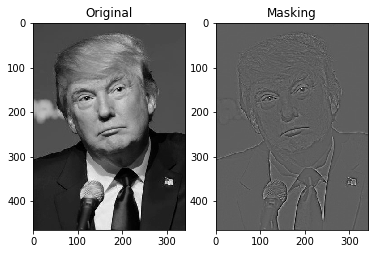

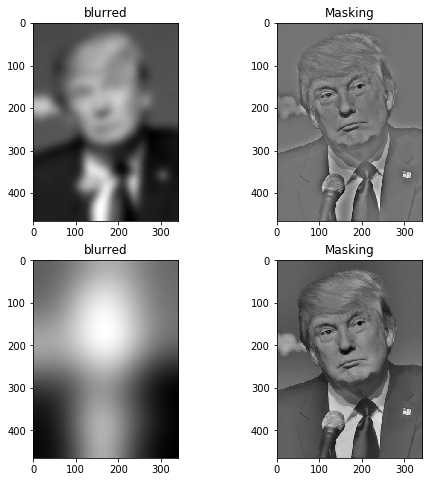

In [4]:
import cv2
import numpy as np,sys
import matplotlib.pyplot as plt 
from skimage.io import imread

#A = cv2.imread('images/imagesRoses.jpg')
A = imread('images/Trump.jpg',as_gray=True)

gauss_img = cv2.GaussianBlur(A, (0, 0), 2.0)
lp = A-gauss_img
plt.subplot(1,2,1), plt.imshow(A,cmap='gray'),plt.title('Original')
plt.subplot(1,2,2), plt.imshow(lp,cmap='gray'),plt.title('Masking')

gauss_img_1 = cv2.GaussianBlur(A, (0, 0), 10.0)
gauss_img_2 = cv2.GaussianBlur(A, (0, 0), 50.0)
lp_1 = A-gauss_img_1
lp_2 = A-gauss_img_2
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.imshow(gauss_img_1,cmap='gray'),plt.title('blurred')
plt.subplot(2,2,2), plt.imshow(lp_1,cmap='gray'),plt.title('Masking')
plt.subplot(2,2,3), plt.imshow(gauss_img_2,cmap='gray'),plt.title('blurred')
plt.subplot(2,2,4), plt.imshow(lp_2,cmap='gray'),plt.title('Masking')

(<matplotlib.axes._subplots.AxesSubplot at 0x237e9af2e48>,
 Text(0.5, 1.0, 'Masking'))

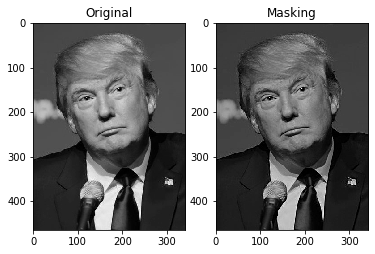

In [3]:
#unsharp masking 
sharpended = A + 0.5*lp

# Taking care of out of range value by saturating the pixels in either direction
# The illumination normalization is the better choice. 

sharpended[sharpended>255] = 255
sharpended[sharpended<0] = 0
plt.figure()
plt.subplot(1,2,1), plt.imshow(A,cmap='gray'),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(sharpended,cmap='gray'),plt.title('Masking')

# Image Pyramid

In [6]:
# Gaussian Pyramid
#To generate a Gaussian pyramid, we iterate between these two steps: 
#    1. Smoothing the image using Gaussian filter in order to remove 
#    high frequency component that could cause aliasing. 
#    2. Down-sampling the smoothed image to reduce the image size by ½
#    at each level.

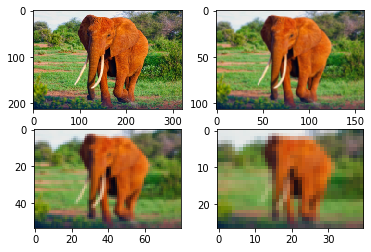

In [7]:
import cv2 
import matplotlib.pyplot as plt 
  
img = cv2.imread("images/elephane.jpg") 
  
layer = img.copy() 
  
for i in range(4): 
    plt.subplot(2, 2, i + 1) 
  
    # using pyrDown() function 
    layer = cv2.pyrDown(layer) 
  
    plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB)) 
    cv2.imshow("str(i)", layer) 
    cv2.waitKey(0) 
          
cv2.destroyAllWindows() 

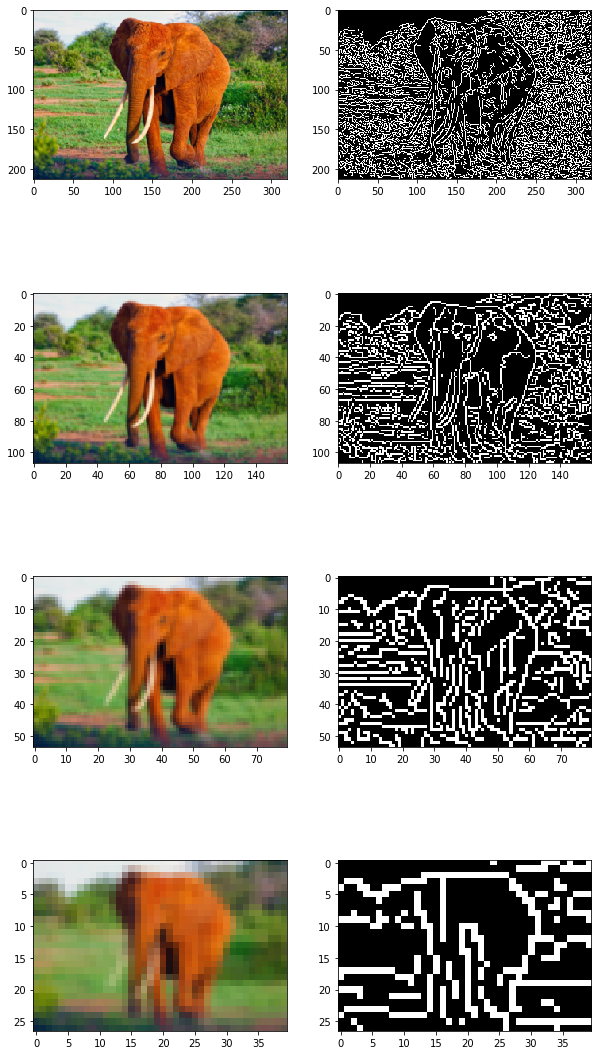

In [8]:
# To see its edge effects
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
  
img = cv2.imread("images/elephane.jpg") 
  
layer = img.copy() 

plt.figure(figsize=(10,20))
for i in range(4): 
    # using pyrDown() function 
    layer = cv2.pyrDown(layer) 
    #img_e = np.uint8(np.absolute(cv2.Laplacian(layer,cv2.CV_64F)))
    img_e = cv2.Canny(layer,80,150)
    plt.subplot(4, 2, 2*i+1) 
    plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB)) 
    plt.subplot(4, 2, 2*i+2) 
    plt.imshow(img_e, 'gray')  

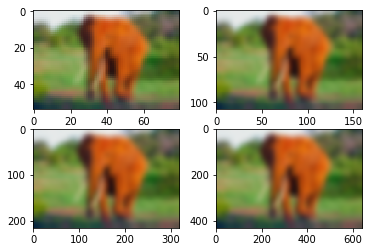

In [9]:
# Upsampling Operator
for i in range(4): 
    plt.subplot(2, 2, i + 1) 
  
    # using pyrUp() function 
    layer = cv2.pyrUp(layer) 
  
    plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB)) 
    cv2.imshow("str(i)", layer) 
    cv2.waitKey(0) 
        
cv2.destroyAllWindows() 

In [10]:
#Laplacain Pyramid

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
img = cv2.imread("images/burt_orange.png")

# Gaussian Pyramid
layer = img.copy()
gaussian_pyramid = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)

# Laplacian Pyramid
layer = gaussian_pyramid[5]
cv2.imshow("6", layer)
laplacian_pyramid = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)
    cv2.imshow(str(i), 10*laplacian)

    cv2.imshow("Original image", img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#Lab 5.1 Pyramid based Unsharp Masking

In [ ]:
#Application: Image Blending 
#We will start with the conventional simple image blending algorithm called
#alpha blending

#alpha blending without mask
import cv2
import numpy as np
import matplotlib.pyplot as plt 

image0 = cv2.imread("images/burt_orange.png")
image1 = cv2.imread("images/burt_apple.png")

alpha = 0.5
blended = alpha * image0 + (1 - alpha) * image1 
blended = np.uint8(blended)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtCol
           or(image0, cv2.COLOR_BGR2RGB)) 
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))

(<matplotlib.axes._subplots.AxesSubplot at 0x237e7709708>,
 Text(0.5, 1.0, 'Stacked Image'))

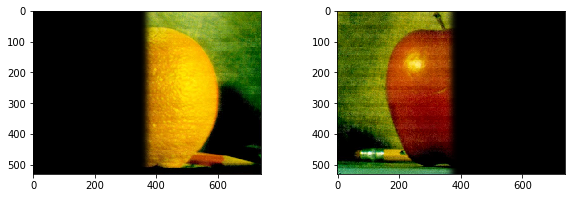

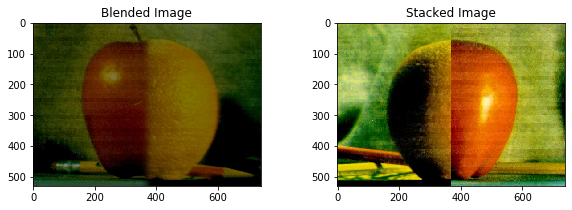

In [14]:
#alpha blending with mask
import cv2
import numpy as np
import matplotlib.pyplot as plt 

image0 = cv2.imread("images/burt_orange.png")
image1 = cv2.imread("images/burt_apple.png")
#image1 = cv2.resize(image1, image0.shape[1::-1])

n = image0.shape
mask0 = np.ones(n)
ncols = n[1]//2

# stack up the image 
ims = np.hstack((image0[:,0:ncols], image1[:,ncols:]))


mask0[:,:ncols] = 0
mask0 = cv2.GaussianBlur(mask0,(51,51),10)
#mask0 = np.uint8(255*mask0) 
mask0 = mask0
mask1 = 1-mask0

#image0 = cv2.bitwise_and(image0, mask0)
#image1 = cv2.bitwise_and(image1, mask1)

image0 = np.uint8(image0*mask0)
image1 = np.uint8(image1*mask1)

alpha = 0.5
blended = alpha * image0 + (1 - alpha) * image1 
blended = np.uint8(blended)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)) 
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)), plt.title('Blended Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(ims, cv2.COLOR_BGR2RGB)), plt.title('Stacked Image')


In [15]:
#Pyramid based blending
import cv2
import numpy as np,sys

A = cv2.imread('images/burt_apple.png')
B = cv2.imread('images/burt_orange.png')

# generate Gaussian pyramid for A
layer = A.copy()
gaussian_pyramid_a = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_a.append(layer)

# generate Gaussian pyramid for B
layer =B.copy()
gaussian_pyramid_b = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_b.append(layer)

    
# Laplacian Pyramid
layer_a = gaussian_pyramid_a[5]
#cv2.imshow("6", layer)
laplacian_pyramid_a = [layer_a]
for i in range(5, 0, -1):
    size = (gaussian_pyramid_a[i-1].shape[1], gaussian_pyramid_a[i-1].shape[0])
    gaussian_expanded_a = cv2.pyrUp(gaussian_pyramid_a[i], dstsize=size)
    laplacian_a = cv2.subtract(gaussian_pyramid_a[i-1], gaussian_expanded_a)
    laplacian_pyramid_a.append(laplacian_a)
# Laplacian Pyramid
layer = gaussian_pyramid_b[5]
#cv2.imshow("6", layer)
laplacian_pyramid_b = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid_b[i-1].shape[1], gaussian_pyramid_b[i-1].shape[0])
    gaussian_expanded_b = cv2.pyrUp(gaussian_pyramid_b[i], dstsize=size)
    laplacian_b = cv2.subtract(gaussian_pyramid_b[i-1], gaussian_expanded_b)
    laplacian_pyramid_b.append(laplacian_b)
    

(<matplotlib.image.AxesImage at 0x237e9be2748>,
 Text(0.5, 1.0, 'Pyramid_blending'))

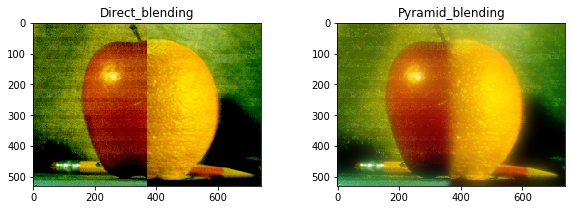

In [16]:
#from keras.preprocessing.image import array_to_img

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(laplacian_pyramid_a,laplacian_pyramid_b):
    rows,cols,dept = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
    
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    size = (LS[i].shape[1],LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_, dstsize=size)
    ls_ = cv2.add(ls_, LS[i])
    
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

#cv2.imwrite('Pyramid_blending2.jpg',ls_)
#cv2.imwrite('Direct_blending.jpg',real)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1), 
plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB)), plt.title('Direct_blending')
plt.subplot(1,2,2), 
plt.imshow(cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB)), plt.title('Pyramid_blending')

In [ ]:
#Lab 5.2 Pyramid based image blending with mask 